# Orbital Dynamics

* **Author:** Chinmay Ambasht

* **Date:** 9.7.23

* **Time spent on this assignment:**

## Overview

In this assignment we will learn how to simulate the orbital dynamics of a planet going around the sun (which we assume to be fixed).  We will then proceed to use simulation to test two of the most important physics results in the last 400 years.  

First, we will numerically validate Kepler's Second Law: a planet sweeps out the same area of its orbit in equal time.  Kepler's first law (all planets 🪐 orbit in ellipses) and Kepler's third law (the square of the orbital period of a planet is directly proportional to the cube of the semi-major axis of its orbit) will be left as extra credit.  

Then we will see that general relativity alters the Newtonian law of gravitation in such a way that the planets no longer move in ellipses.  Instead, their closest approach to the sun (the perihelion) changes its location slightly as you go around the Sun.  Mesuring this effect in Mercury was one of the key original validations of general relativity.

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import math
def resetMe(keepList=[]):
    ll=%who_ls
    keepList=keepList+['resetMe','np','plt','math','jax','jnp','jit','grad']
    for iiii in keepList:
        if iiii in ll:
            ll.remove(iiii)
    for iiii in ll:
        jjjj="^"+iiii+"$"
        %reset_selective -f {jjjj}
    ll=%who_ls
    plt.rcParams.update({"font.size": 14})
    return
#resetMe()
import datetime;datetime.datetime.now()

datetime.datetime(2023, 9, 14, 19, 52, 47, 535362)

##  Warmups

### Planetary Parameters

In [79]:
#resetMe()
SolarSystemParameters=dict()
SolarSystemParameters["MercuryOrbitRadius"]=57.9e9 #meters
SolarSystemParameters["MercuryPerihelion"]=46.0012e9 # meters
SolarSystemParameters["MercuryAphelion"]=69.8169e9 # meters

SolarSystemParameters["EarthRadius"]=6.371e6 #meters
SolarSystemParameters["EarthRotatingVelocity"]=444.444 # meters per second
SolarSystemParameters["EarthOrbitRadius"]=149.6e9 # meters
SolarSystemParameters["EarthOrbitVelocity"]=30e3 # meters per secon
SolarSystemParameters["EarthMass"]=5.972e24 # kg
SolarSystemParameters["MoonOrbitRadius"]=363228.9e3
SolarSystemParameters["MoonMass"]=7.34e22 # kg

SolarSystemParameters["SunRadius"]=695.51e3 #meters
SolarSystemParameters["SunMass"]=1.989e30 # kg
SolarSystemParameters["G"]=6.67408e-11

### Using Dictionaries

We've defined some planetary parameters for you.  Use these parameters to plot a model of our solar system which includes the Sun, Earth and Mercury assuming that the planets orbit in circular motion.  (this doesn't involve any simulations just plotting things to scale.

---

## Exercise 1. Orbital Dynamics

* **List of collaborators:**

* **References you used in developing your code:**

### a. Modify your code to include the force of gravity

In Newton’s model the earth’s gravity is a central force that exerts an attractive pull

$$\vec{F}(\vec{r}) = m\vec{a}(\vec{r}) = -\frac{Gm_\textrm{earth}m}{r^2}\hat{r}$$
between the earth and another mass m. In the formula G is Newton’s constant, $6.674 \times 10^{-11} m^3/\textrm{kg}/\textrm{sec}^2$. The mass of the earth is approximately $5.972 \times 10^{24}$ kg.  Because the gravitational force from the earth is proportional to an object’s mass, its gravitationally induced acceleration is independent of its mass.

Let’s place the origin of a right handed coordinate system at the earth’s center, with the equator lying in the x,y plane and the x axis passing through $0^{\circ}$ longitude. To simplify things let’s assume that the orbit of any object of interest lies in the $x,y$ plane. As you can see in the following figure, the angle φ is taken with respect to the x axis. We are fixing $\theta = 90^{\circ}$.

<div><img src="https://clark.physics.illinois.edu/246img/coord.png" width=400 alt="coordinate frame"></img><br></div>

We can write the $x, y$ components of the gravitational acceleration as

$$a_x = -\frac{Gm_\textrm{earth} }{x^2+y^2}\cos \phi = - \frac{Gm_\textrm{earth} x }{(x^2+y^2)^{3/2}}$$


$$a_y = -\frac{Gm_\textrm{earth} }{x^2+y^2}\sin \phi = - \frac{Gm_\textrm{earth} y }{(x^2+y^2)^{3/2}}$$


🦉Modify your code to correctly incorporate gravity.

Copy over your previous work for an integrator.  Assuming the sun is at (0,0) modify your Modify your force function to implement the gravitational force.  Use the parameters in your force function. Also modify your `Orbit` function to run for a time `params["T"]` instead of when it hits the ground. In my code, I also put in a `param['CrashRadius']` that terminated my code in addition to `param["T"]`.  Btw, if you use the "tab" button it will tell you what's in your SolarSystemParameters dictionary.  There will be nothing to run here just the functions (you will make plots below)

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [80]:
### ANSWER HERE
M_earth = SolarSystemParameters['EarthMass']
M_sun = SolarSystemParameters['SunMass']
G = SolarSystemParameters['G']
def F(t, pos, vel, params, m = SolarSystemParameters['SunMass']):
    return np.array([- 1*(G*m*pos[0])/(pos[0]**2 + pos[1]**2)**1.5 , -1*(G*m*pos[1])/(pos[0]**2 + pos[1]**2)**1.5])
def Midpoint(t, pos, vel, params,force = F, m = SolarSystemParameters['SunMass']):
    dt = params['dt']
    assert(type(pos) == np.ndarray)
    assert(type(vel) == np.ndarray)
    new_t = t + dt
    t_mid  = t + dt/2
    pos_mid = pos + vel*dt/2
    vel_mid = vel + force(t, pos, vel,params)*(dt/2)
    acc_new = force(t_mid,pos_mid,vel_mid,params)
    dx = vel_mid*dt
    dv = (force(t_mid,pos_mid,vel_mid,params))*dt
    position_new = pos + dx
    vel_new = vel + dv
    return new_t, position_new, vel_new,acc_new

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### b.  Earth Orbiting the Sun

Write some code to set up the parameters of the Earth orbiting the sun and then plot it.  Use a dt of 3600 seconds.  This will involve calling your functions from above. You will want to build a dictionary of `params`  which involve things like your initial positions (use Earth's orbital radius), your initial velocity, the time step `dt`, etc.  You should be able to plot it as `plt.plot(positions[:,0],positions[:,1])`
`
<!--
To draw the Earth, I recommend something like:
```python
earth_radius = SolarSystemParameters["EarthRadius"] # m
# create a (blank) figure so we can set some of its attributes.
fig = plt.figure()
ax = fig.gca()
# set labels and title; force square aspect ratio.
ax.set_xlabel("orbit x, km")
ax.set_ylabel("orbit y, km")
ax.set_title("GPS satellite trial orbit")
ax.set_aspect("equal")
# plot stuff,
#plt.plot(xarray, yarray)
# force the axes to be of equal scales...
rmax = np.max( (xarray**2+yarray**2)**0.5)
pltmax = 1.05 * rmax
plt.axis([-pltmax, pltmax, -pltmax, pltmax])
# now draw the earth
earth_disk = plt.Circle((0, 0), earth_radius , color = "#99FF99")
fig.gca().add_artist(earth_disk)
```
-->

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

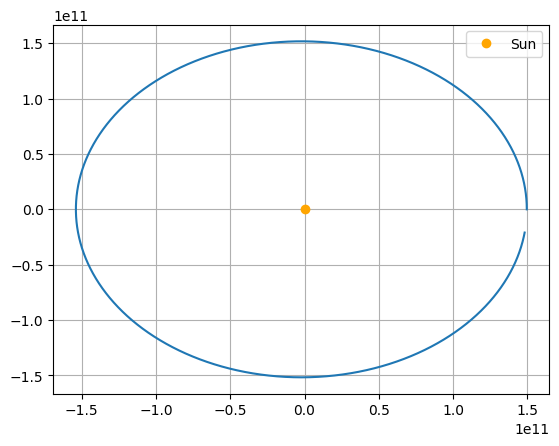

In [81]:
### ANSWER HERE
import copy
params = {'initVel':np.array([0.0,SolarSystemParameters['EarthOrbitVelocity']]),
          'initPos':np.array([SolarSystemParameters['EarthOrbitRadius'],0.0]),
          'dt': 3600,
          'T':3600*24*365}
def orbitSimulator(params,step_func = Midpoint, force = F, m = SolarSystemParameters['SunMass'], r_crash = SolarSystemParameters['SunRadius']):
    t = 0
    ts = []
    ts.append(0)
    positions = []
    velocities = []
    positions.append(params['initPos'])
    velocities.append(params['initVel'])
    pos = np.copy(params['initPos'])
    vel = np.copy(params['initVel'])
    while(True):
        t,pos,vel,acc = step_func(t,pos,vel,params, force,m)
        ts.append(t)
        positions.append(copy.deepcopy(pos))
        velocities.append(copy.deepcopy(vel))
        if(pos[0]**2 + pos[1]**2 < r_crash**2):
            break
        if(t > params['T']):
            break
    return np.longdouble(np.array(ts)),np.longdouble(np.array(positions)),np.longdouble(np.array(velocities))
ts, pos, vel = orbitSimulator(params)
orbit = plt.plot(pos[:,0], pos[:,1])
plt.plot(0,0,'o',color = 'orange', label = 'Sun')
plt.grid(True)
plt.legend()
plt.show()

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### c. Animation

Run the code below to plot an animation of your orbit.  Your coordinates have to be in positions.
```
from matplotlib import animation
from IPython.display import HTML

def animateMe(positions,fullLine=True):
    # First set up the figure, the axis, and the plot element we want to animate
    fig = plt.figure();
    x_min=np.min(positions[:,0])
    x_max=np.max(positions[:,0])*1.1
    y_min=np.min(positions[:,1])
    y_max=np.max(positions[:,1])*1.1

    ax = plt.axes(xlim=(x_min, x_max), ylim=(y_min, y_max));
    #line, = ax.plot([], [], lw=2);
    line, = ax.plot([], [],'bo', ms=10);
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    plt.close(fig)
    # initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        return line,

    # animation function.  This is called sequentially
    def animate(i):
        x = positions[:,0]
        y = positions[:,1]
        if fullLine:
            line.set_data(positions[0:i,0], positions[0:i,1])
        else:
            line.set_data(positions[i,0], positions[i,1])
#        line.set_markersize(10)
        return line,

    # call the animator.  blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=len(positions), interval=20,
                                   blit=True,repeat=False);
    return anim
steps=np.shape(pos)[0]

anim=animateMe(pos[::steps//100],True)
HTML(anim.to_jshtml())

```

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [82]:
### ANSWER HERE
from matplotlib import animation
from IPython.display import HTML

def animateMe(positions,fullLine=True):
    # First set up the figure, the axis, and the plot element we want to animate
    fig = plt.figure();
    x_min=np.min(positions[:,0])
    x_max=np.max(positions[:,0])*1.1
    y_min=np.min(positions[:,1])
    y_max=np.max(positions[:,1])*1.1

    ax = plt.axes(xlim=(x_min, x_max), ylim=(y_min, y_max));
    #line, = ax.plot([], [], lw=2);
    line, = ax.plot([], [],'bo', ms=10);
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    plt.close(fig)

    # initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        return line,

    # animation function.  This is called sequentially
    def animate(i):
        x = positions[:,0]
        y = positions[:,1]
        if fullLine:
            line.set_data(positions[0:i,0], positions[0:i,1])
        else:
            line.set_data(positions[i,0], positions[i,1])
#        line.set_markersize(10)
        return line,

    # call the animator.  blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=len(positions), interval=20,
                                   blit=True,repeat=False);
    return anim
steps=np.shape(pos)[0]

anim=animateMe(pos[::steps//100],True)
HTML(anim.to_jshtml())

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### d. Geosyncronous Orbit (Extra Credit: 5 Points)

Collaborators: James DiCarlo

🦉Determine the height a spaceship needs to be above the surface of the Earth to be in circular Geosynchronous orbit. A geosynchronous orbit is one that stays over the same point of Earth for the entire orbit.   To determine this, we need to set up our orbit simulation to run for an Earth/Satellite simulation.


A useful thing to know is that the velocity that you need to apply tangeant to a circular orbit to stay in a circular orbit of radius $r$ is
$$ v = \sqrt{\frac{GM}{r}} $$

Then compute the orbit of that trajectory.  To show that it's geosynchronous you want it to produce an orbit that is a circle in one day.  You can make your `m` small (say 100 kg).  I recommend a `dt` of 1 second.

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [83]:
### ANSWER HERE

# To determine the height of the orbit of a geosynchronous satellite
M_E = SolarSystemParameters['EarthMass']
G =  SolarSystemParameters['G']
R_E = SolarSystemParameters['EarthRadius']
v = SolarSystemParameters['EarthRotatingVelocity']

P = (2*np.pi*R_E)/v
# To find the height of the geosynchronous satellite
r = ((P**2*G*M_E)/(4*np.pi**2))**(1/3)
h = r - R_E
v = np.sqrt((G*M_E)/r)
print("The height of the geosynchronous satellite is (in km):", h/1000)
print("The velocity of the geosynchronous satellite is (m/s):", v)


The height of the geosynchronous satellite is (in km): 37056.4278447384
The velocity of the geosynchronous satellite is (m/s): 3029.5180883734024


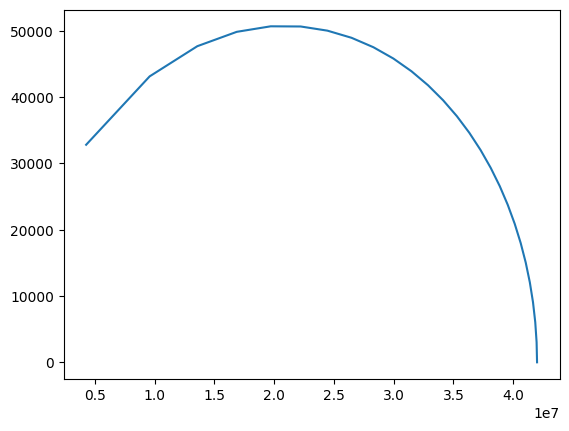

In [86]:
paramsSatellite = {'initPos':[42000000, 0.0],
          'initVel' : [0.0, v],
          'dt': 1,
          'T': P}

ts_sat, pos_sat,vel_sat = orbitSimulator(paramsSatellite,m = SolarSystemParameters['EarthMass'],r_crash = SolarSystemParameters['EarthRadius'])
plt.plot(pos_sat[:,0],pos_sat[:,1])

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

---

## Exercise 2. Kepler's Laws

* **List of collaborators:**

* **References you used in developing your code:**

Kepler developed three laws about planetary motion (using data from Tycho Brahe on planetary motion).  In this exercise you will explicitly check Kepler's laws.

The three laws are (from ([wikipedia](https://en.wikipedia.org/wiki/Kepler%27s_laws_of_planetary_motion)):

(1) The orbit of a planet is an ellipse with the Sun at one of the two foci.

(2) A line segment joining a planet and the Sun sweeps out equal areas during equal intervals of time.

(3) The square of the orbital period of a planet is directly proportional to the cube of the semi-major axis of its orbit.

### a. Law 2

Kepler's second law tells us that the planet sweeps out the same "area" of the ellipse in a fixed amount of time.  
🦉Verify this by computing (and plotting) the area swept out in these two regions:

* $0.2 T_\textrm{orbit}<t<0.2T_\textrm{orbit}+0.1T_\textrm{orbit}$
* $0.6 T_\textrm{orbit}<t<0.6 T_\textrm{orbit}+0.1T_\textrm{orbit}$

where $T_\textrm{orbit}$ is the total time for an orbit.  Use Earth's orbit to do this and a time-step of 1 hour.  

To compute the area, I summed a bunch of triangles that make up the points on the orbit.  Toward that end I found it useful to write a `TriangleArea` function.

Here is an example of the area sweeped out for 0.1T of an orbit at different times (**but note that this is for a random orbit and not Earth's orbit!**):

<div><img src="https://clark.physics.illinois.edu/246img/KeplerSecond.png" width=600  alt="Kepler Second Law"></img><br></div>

You should report what your two areas are.

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

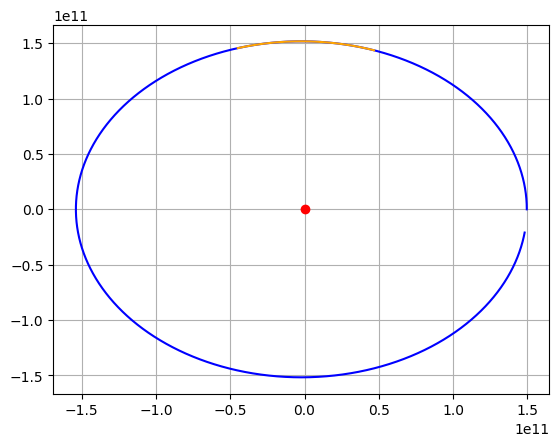

7.076678362715636144e+21


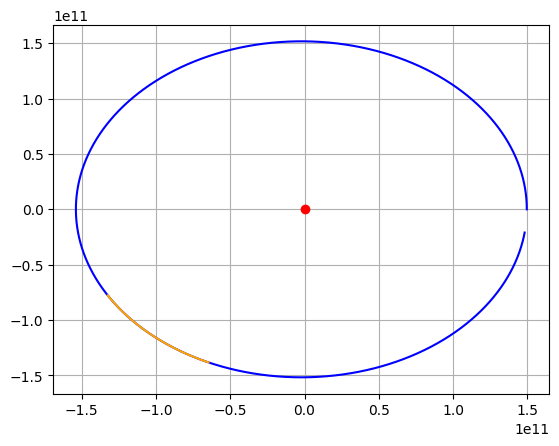

7.0766783383182334474e+21


In [88]:
### ANSWER HERE
params = {'initVel':np.array([0.0,SolarSystemParameters['EarthOrbitVelocity']]),
          'initPos':np.array([SolarSystemParameters['EarthOrbitRadius'],0.0]),
          'dt': 3600,
          'T':3600*24*365}

def FindIndex(targetT, ts):
    diff = np.abs(targetT - ts)
    return np.where(diff < 1e-15)
def TriangleArea(start, end):
    ts,pos,vel = orbitSimulator(params)
    startIndex = int(FindIndex(start, ts)[0])
    endIndex = int(FindIndex(end, ts)[0])
    plt.plot(pos[:,0],pos[: ,1],color = 'blue')
    plt.plot(pos[startIndex:endIndex,0],pos[startIndex:endIndex,1], color = 'orange')
    plt.plot(0,0,'o',color = 'red')
    plt.grid(True)
    plt.show()
    A = 0
    for i in np.arange(startIndex,endIndex):
       A += np.abs(pos[i+1,0]*pos[i,1] - pos[i,0]*pos[i+1,1])
    return A*0.5

print(TriangleArea(0.2*params['T'], 0.3*params['T']))
print(TriangleArea(0.6*params['T'],0.7*params['T']))


<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### b. Law 1 (Extra Credit: 10 points)

The first law tells us that the orbit is an ellipse and the sun is at a foci.  🦉To check this,
* Modify the constants in your code to emulate planets (i.e. let `M` be the mass of the sun, $M_\textrm{sun} = 1.989 \times 10^{30}$ kg)
* Let `dt` be an hour
* Emulate some eccentric orbits.  To do this, change the initial velocity by a little bit.  This will give you some eccentric orbits.
* Check that the orbit you get is an ellipse with the sun is a foci.

The latter is a little subtle.  To check that you have an ellipse, we should verify that the points (`orbit.xs`) satisfy the general equation for an ellipse.  

The general equation for an ellipse ([stackexchange](https://math.stackexchange.com/questions/426150/what-is-the-general-equation-of-the-ellipse-that-is-not-in-the-origin-and-rotate)) is

$$ \frac{((x-h)\cos(A) + (y-k)\sin(A))^2}{a^2} + \frac{((x-h)\sin(A) - (y-k)\cos(A))^2}{b^2} =1$$

where $a$ is the length of the semi-major axis, $b$ is the length of the semi-minor axis, $(h,k)$ is the center of the ellipse and $A$ is the angle of the ellipse.

Given a foci, we can compute the points closest and further from the loci, $p_{min}$ and $p_{max}$ which are at distance $r_{min}$ and $r_{max}$.

With these we can compute  
* $a=\frac{r_\textrm{min}+r_\textrm{max}}{2}$   
* $b=\sqrt{r_\textrm{min}r_\textrm{max}}$  
* the center $(h,k) = (p_\textrm{max}+p_\textrm{min})/2$.  
* the semi-major axis $\vec{a}=(p_\textrm{max}-p_\textrm{min})$
* the angle $A=\tan^{-1}[\vec{a}(1)/\vec{a}(0)]$

I wrote a function `CheckEllipse` that given a set of coordinates (and the foci of the sun at the origin) assumed it was an ellipse and checked if the points obeyed this equation.

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
### ANSWER HERE

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### c. Law 3: (Extra Credit: 10 points)

Kepler's third law tells us that the square of the orbital period of a planet is directly proportional to the cube of the semi-major axis of its orbit.

In other words, $T^2 \propto a^3$.

*From Wikipedia quoting Kepler on finding the third law:*


🦉Verify Kepler's third law by computing the orbital period $T$ (write a function that finds when your orbit essentially gets back to its starting place) and the semi-major axis (as you did above) for 25 different orbits.  To generate these orbits use random initial starting velocities of the form

```python
v_circ = np.sqrt(G*M/r0)
v0=[v_circ+np.random.uniform(-0.2,0.2)*v_circ,np.random.uniform(-0.2,0.2)*v_circ]
```

Then graph $T^2$ vs. $a^3$ and show that this makes a line.  🦉Show that the slope of this line is
$$\frac{GM}{4\pi^2}$$

It is helpful to add code to your class that stops your simulation after you return to the starting point. This can be done by either:
* checking that the distance from the starting point gets further away->closer->further away
* monitoring the $r$ of your planet
* by checking how close the $x$ location is to your initial spot  


It'll save you valuable running time if you implement this, but it is not necessary.

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
### ANSWER HERE

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

## Background (just information...no work on this problem)

**Post-Newtonian gravitational orbits**

Trajectories in $1/r^2$ central force fields are conic sections: hyperbolas or parabolas for unbound objects, and ellipses for objects in bound orbits. A special property of an inverse-square force is that bound orbits close on themselves—the orientation in space of the ellipse remains fixed. But if gravity were to deviate from a purely inverse-square force law, bound orbits would not close (unless they were perfectly circular), and could not strictly be described as ellipses.

One of the earliest tests of general relativity was its prediction for the rate at which Mercury’s orbit would change its orientation over time. Mercury’s distance from (the center of) the sun varies from 46,001,200 km at perihelion (the point at which Mercury is closest to the sun) to 69,816,900 km at aphelion, so it samples the strength of the sun’s gravitational pull over a significant range of distance.

The orbit’s long axis precesses 574.1 seconds of arc per century. [<sup>1</sup>](#fn1). (There are 3,600 seconds of arc in one degree.) Most of this is due to the perturbing effects of the other planets, but there is a measurable contribution of 43 seconds of arc per century from the small differences between the (approximately correct) Newtonian and (extraordinarily accurate) Einsteinian descriptions of gravity. The force law, according to general relativity, isn’t quite an inverse square relation. [<sup>2</sup>](#fn2)

The precession rate is small. During the course of one orbit of 87.969 days, the perihelion will shift by $(5.022 \pm 0.005) \times 10^{-7}$ radians due to general relativistic effects. This corresponds to a displacement in space of about 23 km for one orbit’s perihelion relative to the previous orbit’s, added to the much larger Newtonian perturbations from the other planets.

In weak gravitational fields we can accommodate the effects of general relativity as a slight modification [<sup>3</sup>](#fn3) to the acceleration of a mass $m$ in an almost-elliptical orbit around the sun:


$$ \frac{F(r)}{m} = -\frac{GM_\odot}{r^2} + -\frac{3r_s\left(v_\textrm{perihelion}r_\textrm{perihelion}\right)^2}{2r^4}$$

where $M_\odot=1.98855 \times 10^{30}$ kg is the mass of the sun.[<sup>4</sup>](#fn4).  You may recall that the Schwarzschild radius $r_s$ of an object of mass $M$ is $2GM/c^2$, and that the sun's $r_s$ is 2,953.36 meters.  For Mercury $v_\textrm{perihelion}=58,980$ m/s while $r_\textrm{perihelion} = 46,001,200$ km.  (Note that the formula requires the perihelion radius to be expressed in meters.)[<sup>5</sup>](#fn5)

Just for your information, here is a table of contributions to the Newtonian precession of Mercury’s perihelion from the other planets. The largest come from Venus (because it is so close to Mercury) and Jupiter (because it is so massive). These are taken from the work of the 19th century astronomer Urban LeVerrier.[<sup>6</sup>](#fn6).  I think they’re probably reasonable approximations to the exact values.

|planet|arc-seconds per century	| microradians per orbit|
|------|------------------------|-----------------------|
|Venus |280.6 |3.28|
|Earth |83.6 |0.98|
|Mars |2.6 |0.03|
|asteroids |not calculated <br />(perhaps ~0.13) |0.002|
|Jupiter |152.6 |1.78|
|Saturn |7.2 |0.08|
|Uranus|0.1 |0.001|
|Neptune|not calculated <br />(perhaps ~0.04) |0.0005|
|Pluto|Pluto was discovered in 1930. <br />(should be negligible)| |
|Total|526.7 |6.15|

## Exercise 3: Mercury Precession

* **List of collaborators:** James DiCarlo

* **References you used in developing your code:**

Our goal in this exercise is to determine how general relativity affects the precision of Mercury.  We know from Kepler's laws that objects orbiting around a central body orbit in an ellipse.  That means the second time around their orbit they come back to the same place that they started.  If you have more then two bodies (like above) or if there are corrections to gravity from general relativity (which there are), then you aren't going to come back exactly to the same place.  Instead the orbit precesses around.  There's a good picture [here](https://aether.lbl.gov/www/classes/p10/gr/PrecessionperihelionMercury.htm).   

In this assignment, it will be important to work with all your arrays being ***long doubles***.   You should be able to accomplish this mainly by setting the initial conditions of your array to long double.

To measure the precision you want measure the angle between two consecutive perihelions (the closest distance on ellipse of the orbit). The most sensible thing is to start at the perihelion and then measure its closest distance when it comes around again.  This is not too hard to do but a bit tricky to get correct.  Here is a good prescription:
* Start at the perihelion.
* Perform slightly more then one orbit (say 10% more)
* Measure the index in the array for the closest distance you get when you come back around.  To avoid measuring the fact that you are close at your "starting" location, I recommend that you look for your closest distance that isn't in the first quarter of the orbit.
*  Now, because you are taking discrete time steps, the closest location you find might not actually be the closest location (because maybe it got closer somewhere between the steps you took).  This will matter for this measurement.  To fix this, let's interpolate between around this part of the orbit.  
    * Take the three points before and after the position you found in the orbit
    * Fit a quadratic curve around this part of the orbit: `line=np.polyfit(x,y,2)`
    * Find the closest location of this curve by producing a new array with 100000 points which goes from the three points before and after the position you found `np.linspace`
    * Get the angle between the lines (sun,original perihelion) and (sun, new perihelion)
    
It will probably help you if you write a function perihelion that takes the positions array and generates the angle of precision.

### a.  Mercury without general relativity

For our first step, we will compute the precession when we don't have the relativistic term on.  If our integration was perfect, we should get zero. As we recall from earlier assignments, we know that that there is some time-step errors associated with our integration.  So instead of getting zero, we would expect to get something very close to zero.

You are going to base your Mercury perihelion code on your orbital code from previous units. Let's start by setting up your code for simulating Mercury's orbit:

* $r_\textrm{min}=4.60012 \times 10^{10}$ m - i.e. `params["initPos"]=np.array([0.0,4.60012e10])`
* $v=5.898 \times 10^{4}$ m/s
* $T=60 \times 60 \times 24 \times 88 \times 1.1$ sec  (1.1 Mercury Years)
* $dt=60$  sec.

You need to make sure that all of your parameters are long doubles.  To do this I do
```
for key in params.keys():
  params[key]=np.longdouble(params[key])
```

Plot the orbit of the eccentric Mercury and  report the closest and furthest distance your simulation gets from the sun.
You should find a minimum distance of 46001200000.517811935.

Then find the closest distance and nearby 5 points the second time around the orbit *not* where you started.  You should get
```
x                    y                    r
-10087525.09595282 46001199082.443085 46001200188.48122315
-6548725.141774705 46001199613.28912 46001200079.42697562
-3009925.1554468116 46001199918.30062 46001200016.772504188
528874.8456577625 46001199997.47758 46001200000.517809045
4067674.8441659217 46001199850.81999 46001200030.66289309
7606474.822704569 46001199478.327866 46001200107.20775908
```


If you're not getting this, then you should check again.  


Make a separate plot of just these 5 points.

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

Perihelion of Mercury: 46001200000.517811935
Aphelion of Mercury: 69791968744.29795106


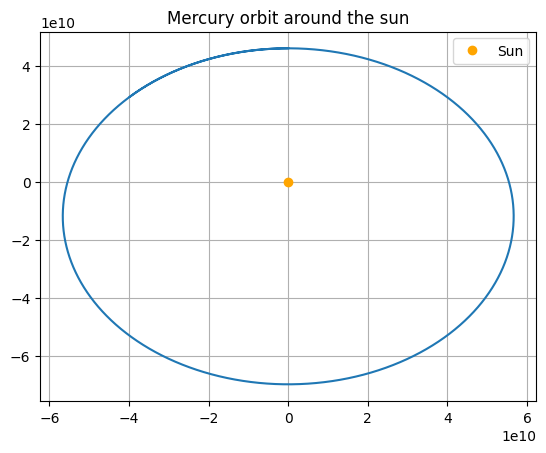

In [89]:
### ANSWER HERE
params = {'initVel':np.array([-5.898e4,0.0]),
          'initPos':np.array([0.0, 4.60012e10]),
          'dt': 60,
          'T':60*60*24*88*1.1}
for key in params.keys():
    params[key] = np.longdouble(params[key])
for key in SolarSystemParameters.keys():
    SolarSystemParameters[key] = np.longdouble(SolarSystemParameters[key])

# Slicing the arrays in quarter time and beyond
ts, pos_Mercury, vel_Mercury = orbitSimulator(params)
quarter_idx = int(len(ts)/4)
ts_quarter = np.longdouble(ts[quarter_idx:])
pos_quarter = np.longdouble(pos_Mercury[quarter_idx:,:])
vel_quarter = np.longdouble(vel_Mercury[quarter_idx:,:])

# Printing the minimum and maximum values of the absolute distande
r_quarter = np.longdouble(np.sqrt(pos_quarter[:,0]**2 + pos_quarter[:,1]**2))
print('Perihelion of Mercury:',r_quarter.min())
print('Aphelion of Mercury:',r_quarter.max())
# minimum distance of 46001200000.517811935

orbit = plt.plot(pos_Mercury[:,0], pos_Mercury[:,1])
sun = plt.plot(0,0,'o',color = 'orange',label = 'Sun')
plt.title(r'Mercury orbit around the sun')
plt.grid(True)
plt.legend()
plt.show()

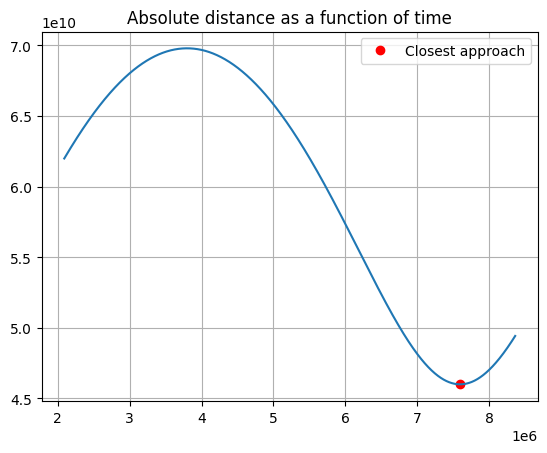

In [90]:
closest_loc = FindIndex(r_quarter.min(),r_quarter)[0]
plt.plot(ts_quarter[closest_loc],r_quarter[closest_loc],'o',color = 'red', label = 'Closest approach')
plt.plot(ts_quarter,r_quarter)
plt.title('Absolute distance as a function of time')
plt.legend()
plt.grid(True)

Text(0.5, 1.0, 'Closest points to perihelion of Mercury')

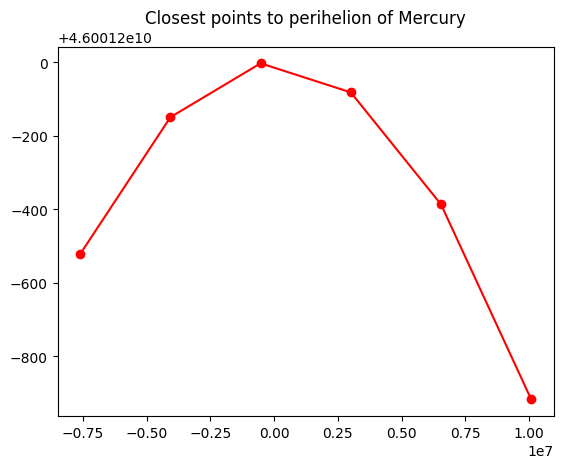

In [91]:
X = np.float64(pos_quarter[int(closest_loc - 3): int(closest_loc + 3), 0])
Y = np.float64(pos_quarter[int(closest_loc - 3): int(closest_loc + 3), 1])
r = np.float64(np.sqrt(X**2 + Y**2))
plt.plot(X,Y,'o',color = 'red')
plt.plot(X,Y,color = 'red')
plt.title('Closest points to perihelion of Mercury')

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (start)"></img><br></div>

### b. Interpolating to find the  precession


Now we need to take our data of those 6 points above and interpolate between them.  (Use your actual orbital data not the copied numbers above - you need higher precision then is being printed out.)

Put the 6 points in an array `x` and `y` respectively.  You may have to do something like  `x=np.float64(pos[closest_loc-3:closest_loc+3,0])` to get it to be low enough precision for the polyfit (next step) to work.

Now interpolate between them using `line=np.polyfit(x,y,2)`.

Now make a new `xs` array which has  100000 points between x[0] and x[-1].  This will be a very fine grid.  Then make a `ys` array that uses the quadratic fit in `line` and the `xs` array to give you the interpolated values.  

Plot both the `x` and `y` array as points as well as the `xs` and `ys` array as lines.  This line should interpolate nicely through your points.

Finally, using your new `xs` and `ys` array you should get that the nearest distance is something very close to `46001199999.997996964`.

Now you should be able to get the actual coordinate of the closest point (the second time around).  Using this you can get the precession angle.
I get that it is -0.017013797776581767923 radians (but because this is very sensitive to precision, anything less then 0.03 is fine.)

We will consider anything less then 0.03 microradians in magnitude essentially zero.  



<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

The distance of closest approach: 46001199999.99799
The closest coordinates of closest approach [1.49040198e+03 4.60012000e+10]


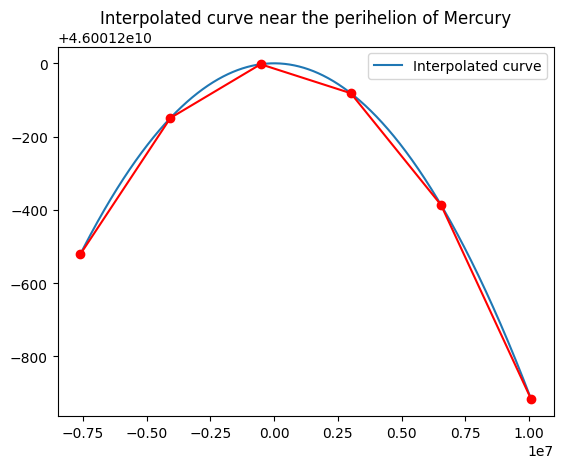

In [92]:
### ANSWER HERE

# Fitting the quadratic curve
line  = np.polyfit(X,Y,2)
xs = np.linspace(X[0],X[-1],100000)
ys = line[2] + xs*line[1] + xs**2*line[0]

# Plotting the interpolated curve
plt.plot(xs,ys ,label = 'Interpolated curve')
plt.plot(X,Y,'o',color = 'red')
plt.plot(X,Y,color = 'red')
plt.title('Interpolated curve near the perihelion of Mercury')

# code to check with the first orbit of Mercury
# plt.plot(pos_Mercury[:,0],pos_Mercury[:,1], label = 'First Cycle',color = 'green')
# plt.ylim(params['initPos'][1] - 200, params['initPos'][1] + 40)
# plt.xlim(-0.5e7,0.5e7)
plt.legend()

#Finding the closest location in the interpolated curve
def FindIndex_modified(targetT, ts):
    curr = 0
    diff = np.abs(targetT - ts)
    dist = diff[0]
    for i in range(len(ts)):
      if(diff[i] < dist):
        dist = diff[i]
        curr = i
    return curr
r = np.sqrt(xs**2 + ys**2)
closest_idx = FindIndex_modified(r.min(),r)
print("The distance of closest approach:", ys[closest_idx])
closest_coords = np.array([xs[closest_idx], ys[closest_idx]])
print("The closest coordinates of closest approach", closest_coords)


In [ ]:
def precession(firstCycle, secondCycle):
  r1_perihelion = np.sqrt(firstCycle[0]**2 + firstCycle[1]**2)
  r2_perihelion = np.sqrt(secondCycle[0]**2 + secondCycle[1]**2)
  return np.arccos((np.dot(firstCycle,secondCycle)/(r1_perihelion*r2_perihelion)))
precession(params['initPos'],closest_coords)


<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### c.  Mercury with general relativity

Now turn on the effects of general relativity (by modifying your force) and do the same computation.

The post-Newtonian modification to the gravitational acceleration experienced by Mercury adds an extra term after the inverse-square Newtonian term:
$$ \frac{F(r)}{m} = -\frac{GM_\odot}{r^2} - \frac{3r_s\left(v_\textrm{perihelion}r_\textrm{perihelion}\right)^2}{2r^4}$$

The Schwarzschild radius of the sun is $r_S = 2,953.36$ meters. Mercury’s speed at perihelion is
$v_\textrm{perihelion} = 58,980$ m/s while its $r_\textrm{perihelion} = 4.60012e10$ m.

🦉Please add the post-Newtonian term to the acceleration of gravity and repeat parts (a) and (b)

I now get (in 11 seconds)
```
The minimum location before interpolation is  46001200000.654238053
The minimum location after interpolation is  46001199999.99801791
The maximum location is  46923484445.272278626
The precision angle I get is  0.4887683792163817
```

Note that the actual value is 0.5022 microradians per orbit. That’s pretty good!

**HINT:** For this assignment you need to get points around the closest distance (the second time around the orbit *not* where you start.  You should get some of the close points as
```
x                   y                   r
-9998967.016889445 46001199099.338745 46001200186.04237594
-6460167.061694921 46001199624.2306 46001200077.84657632
-2921367.0747853755 46001199923.28789 46001200016.05052716
617432.9264660933 46001199996.51061 46001200000.654237192
4156232.9246863867 46001199843.898766 46001200031.65769507
7695032.902502406 46001199465.452354 46001200109.060909245
```

If you're not getting this, then you should check again.  Then you need to interpolate through this data (`    line=np.polyfit(x,y,2)`).  Finally, you should get that the nearest distance is (after interpolation) something very close to `46001199999.99801791`.

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [93]:
### ANSWER HERE
### ANSWER HERE

SolarSystemParameters['Schwarzschild'] = np.longdouble(2953.36)
SolarSystemParameters['Perihelion_Velocity'] = np.longdouble(58980)
SolarSystemParameters['Perihelion_Radius'] = np.longdouble(4.60012e10)
r_s = SolarSystemParameters['Schwarzschild']
v_p = SolarSystemParameters['Perihelion_Velocity']
r_p = SolarSystemParameters['Perihelion_Radius']
def RadialGrav(pos, params):
  x,y = np.longdouble(pos[0]), np.longdouble(pos[1])
  r = np.longdouble(np.sqrt(x**2 + y**2))
  F = -1*((SolarSystemParameters['G']*SolarSystemParameters['SunMass'])/r**2)  - ((3*r_s*v_p**2*r_p**2)/(2*r**4))

  return np.longdouble(F)

def Components_Gravity(t,pos,vel,params):
  x, y = pos[0], pos[1]
  cos_phi = np.longdouble(x / np.sqrt(x**2 + y**2))
  sin_phi = np.longdouble(y / np.sqrt(x**2 + y**2))
  force_r = RadialGrav(pos, params)
  return np.array([force_r*cos_phi, force_r*sin_phi], dtype=np.longdouble)



Perihelion of Mercury: 46001200000.65423859
Aphelion of Mercury: 69791954512.0315664


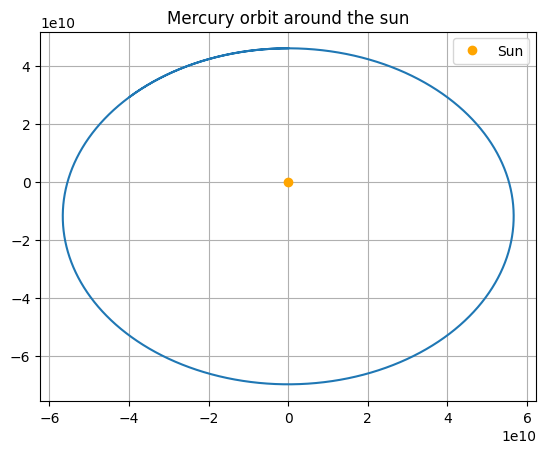

In [94]:
params = {'initVel':np.array([-5.898e4,0.0]),
          'initPos':np.array([0.0, 4.60012e10]),
          'dt': 60,
          'T':60*60*24*88*1.1}

for key in params.keys():
    params[key] = np.longdouble(params[key])
for key in SolarSystemParameters.keys():
    SolarSystemParameters[key] = np.longdouble(SolarSystemParameters[key])

# Slicing the arrays in quarter time and beyond
ts, pos_Mercury, vel_Mercury = orbitSimulator(params, force = Components_Gravity)
quarter_idx = int(len(ts)/4)
ts_quarter = np.longdouble(ts[quarter_idx:])
pos_quarter = np.longdouble(pos_Mercury[quarter_idx:,:])
vel_quarter = np.longdouble(vel_Mercury[quarter_idx:,:])

# Printing the minimum and maximum values of the absolute distande
r_quarter = np.longdouble(np.sqrt(pos_quarter[:,0]**2 + pos_quarter[:,1]**2))
print('Perihelion of Mercury:',r_quarter.min())
print('Aphelion of Mercury:',r_quarter.max())
# minimum distance of 46001200000.517811935

orbit = plt.plot(pos_Mercury[:,0], pos_Mercury[:,1])
sun = plt.plot(0,0,'o',color = 'orange',label = 'Sun')
plt.title(r'Mercury orbit around the sun')
plt.grid(True)
plt.legend()
plt.show()

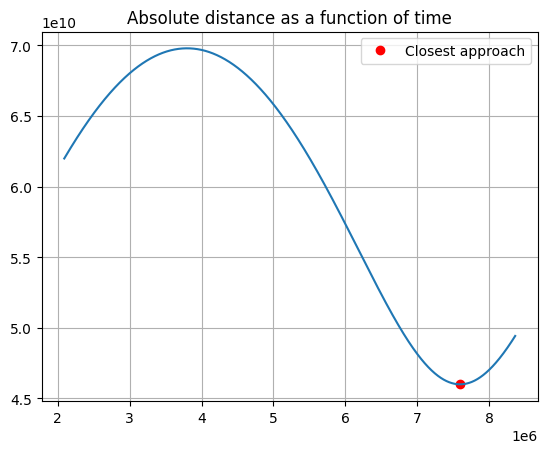

In [95]:
closest_loc = FindIndex(r_quarter.min(),r_quarter)[0]
plt.plot(ts_quarter[closest_loc],r_quarter[closest_loc],'o',color = 'red', label = 'Closest approach')
plt.plot(ts_quarter,r_quarter)
plt.title('Absolute distance as a function of time')
plt.legend()
plt.grid(True)

Text(0.5, 1.0, 'Closest points to perihelion of Mercury')

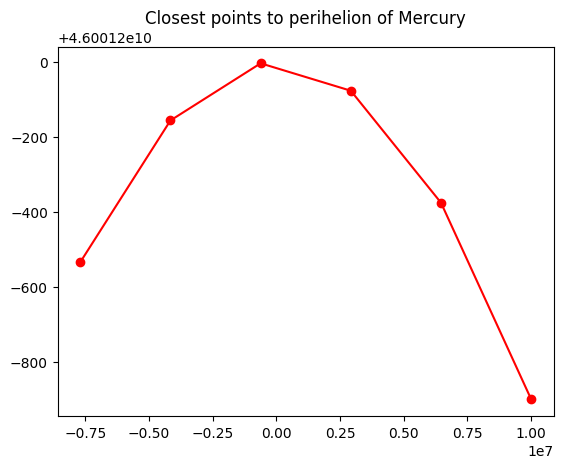

In [96]:
X = np.float64(pos_quarter[int(closest_loc - 3): int(closest_loc + 3), 0])
Y = np.float64(pos_quarter[int(closest_loc - 3): int(closest_loc + 3), 1])
r = np.float64(np.sqrt(X**2 + Y**2))
plt.plot(X,Y,'o',color = 'red')
plt.plot(X,Y,color = 'red')
plt.title('Closest points to perihelion of Mercury')

The distance of closest approach: 46001199999.99321
The closest coordinates of closest approach [-2.10683978e+04  4.60012000e+10]


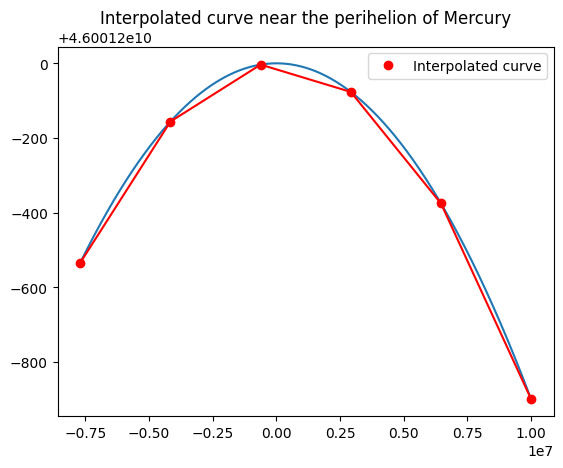

In [97]:

# Fitting the quadratic curve
line  = np.polyfit(X,Y,2)
xs = np.linspace(X[0],X[-1],100000)
ys = line[2] + xs*line[1] + xs**2*line[0]

# Plotting the interpolated curve
plt.plot(xs,ys)

plt.plot(X,Y,'o',color = 'red', label = 'Interpolated curve')
plt.plot(X,Y,color = 'red')
plt.title('Interpolated curve near the perihelion of Mercury')
plt.legend()
#Finding the closest location in the interpolated curve
def FindIndex_modified(targetT, ts):
    curr = 0
    diff = np.abs(targetT - ts)
    dist = diff[0]
    for i in range(len(ts)):
      if(diff[i] < dist):
        dist = diff[i]
        curr = i
    return curr
#closest_idx1 = FindIndex(params['initPos'][1],pos[:,1])[0]
#plt.plot(pos[:,0],pos[:,1])
r = np.sqrt(xs**2 + ys**2)
closest_idx = FindIndex_modified(r.min(),r)
print("The distance of closest approach:", ys[closest_idx])
closest_coords = np.array([xs[closest_idx], ys[closest_idx]])
print("The closest coordinates of closest approach", closest_coords)



In [98]:
def precession(firstCycle, secondCycle):
  r1_perihelion = np.sqrt(firstCycle[0]**2 + firstCycle[1]**2)
  r2_perihelion = np.sqrt(secondCycle[0]**2 + secondCycle[1]**2)
  return np.arccos((np.dot(firstCycle,secondCycle)/(r1_perihelion*r2_perihelion)))
precession(params['initPos'],closest_coords)

4.5786144594552630472e-07

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (start)"></img><br></div>

## Exercise 4. Transfer Orbits (Extra Credit: 10 points)

* **List of collaborators:**

* **References you used in developing your code:**

If you are trying to get spacecraft around the solar system, an important thing to be able to do is to get a spacecraft from one point to another point in a time $T$.  To do this, the spacecraft will need to choose a particular velocity (speed and direction) to be heading in. Write a function ```Transfer(pos1,pos2,T)``` which determines the velocity to get the spacecraft from pos1 to pos2 in time T.

# Exercise 5. Black Holes

Here we have simulated a orbit around the Sun.  We got away with using a perturbative correction to get the correct equations of motion for GR because the gravity of the Sun was not that strong.  Now we would like to orbit a black hole.  Go ahead and simulate the equations of motion around a black hole.

---

© Copyright 2020

* Ex 1: George Gollin (original); Bryan Clark (modifications)
* Ex 2: Bryan Clark (original)
* Ex 3: George Gollin (original); Bryan Clark (modifications)